In [2]:
# Imports
import torch
from transformers import AutoTokenizer, GPT2LMHeadModel
import numpy as np
import random
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KernelDensity

/Users/anikethiyengar/miniconda3/envs/local_nmt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

In [4]:
GloVe = {}
with open("glove.6B/glove.6B.100d.txt", "r", encoding="utf-8") as vector_file:
    for line in vector_file:
        line_content = line.split()
        word = line_content[0]
        # There's probably a better way to read strings into a FloatTensor
        word_vec = torch.from_numpy(np.asarray(line_content[1:], "float32"))
        GloVe[word] = word_vec

In [5]:
# Define Word Bank
word_bank = ["academy", "advance", "aircraft", "ally", "ammo", "ammunition", "armor", "arms", "army", "arrow", "arsenal", "artillery", "attack", "attention", "ballistic", "barracks", "base", "battalion", "battery", "battle", "battlefield", "bomb", "bombard", "bombardment", "brig", "brigade", "bullet", "camouflage", "camp", "cannon", "captain", "capture", "carrier", "casualty", "catapult", "cavalry", "colonel", "combat", "command", "commander", "commission", "company", "conflict", "conquest", "convoy", "corps", "covert", "crew", "decode", "defeat", "defend", "defense", "destroyer", "division", "draft", "encode", "enemy", "engage", "enlist", "evacuate", "explosive", "fight", "fire", "fleet", "force", "formation", "fort", "front", "garrison", "general", "grenade", "grunt", "guerrilla", "gun", "headquarters", "helmet", "honor", "hospital", "infantry", "injury", "intelligence", "invade", "invasion", "jet", "kill", "leave", "lieutenant", "major", "maneuver", "marines", "MIA", "mid", "military", "mine", "missile", "mortar", "navy", "neutral", "offense", "officer", "ordinance", "parachute", "peace", "plane", "platoon", "private", "radar", "rank", "recruit", "regiment", "rescue", "reserves", "retreat", "ribbon", "sabotage", "sailor", "salute", "section", "sergeant", "service", "shell", "shoot", "shot", "siege", "sniper", "soldier", "spear", "specialist", "squad", "squadron", "staff", "submarine", "surrender", "tactical", "tactics", "tank", "torpedo", "troops", "truce", "uniform", "unit", "veteran", "volley", "war", "warfare", "warrior", "weapon", "win", "wound"]

In [50]:
for word in word_bank:
    if "military" == word:
        print(1)

1


In [6]:
# Create Word Embeddings Matrix
wb_embeddings = torch.zeros((len(word_bank), 100))

for i, word in enumerate(word_bank):
    wb_embeddings[i] = GloVe[word.lower()]
    
wb_embeddings.size()

torch.Size([149, 100])

In [7]:
def dot_similarity_score(word_emb):
    similarities = torch.matmul(wb_embeddings, word_emb)
    return similarities

In [8]:
def calc_p_value(score, dist):
    score = float(score)
    distribution = dist.tolist()
    count = 0
    for val in distribution:
        if val >= score:
            count += 1
    emp_p = float(count) / NUM_SAMPLES
    return emp_p

In [43]:
def calculate_score(emb):
    sims = dot_similarity_score(emb).tolist()
    p = []
    
    for i, sim in enumerate(sims):
        p.append(calc_p_value(sim, dot_samples[i]))
    
    return p
    return np.mean(p) * 100

In [10]:
# Create background distributions
sample = 0
NUM_SAMPLES = 50000
vocab = list(GloVe.values())
dot_samples = torch.zeros((NUM_SAMPLES, len(word_bank)))

while sample < NUM_SAMPLES:
    word = random.choice(vocab)
    dot_vector = dot_similarity_score(word)
    dot_samples[sample] = dot_vector
    sample += 1
        
# Reshape so that it is indexable by word
dot_samples = dot_samples.reshape(len(word_bank), NUM_SAMPLES)

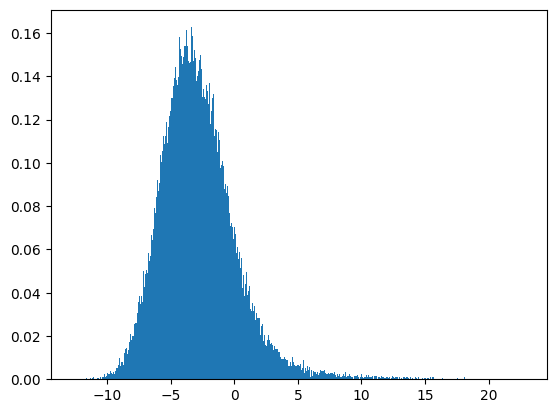

In [32]:
# Plot Distribution
plt.hist(dot_samples[0].tolist(), bins=500, density=True)
plt.show()

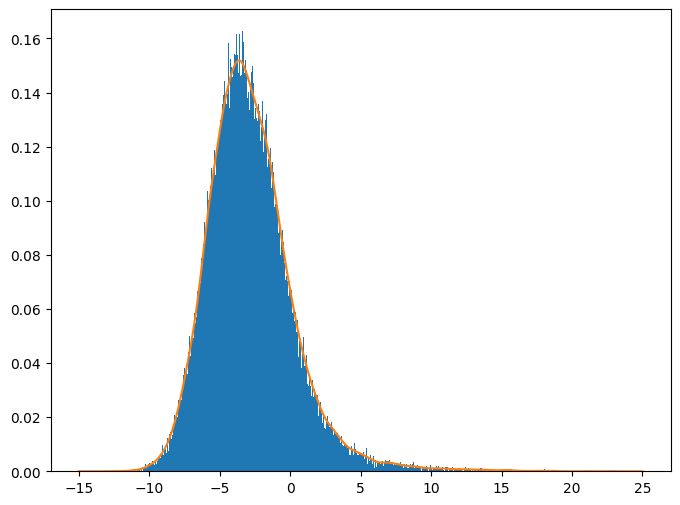

In [39]:
kde = stats.gaussian_kde(dot_samples[0].tolist())
xx = np.linspace(-15, 25, 5000)
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(dot_samples[0].tolist(), density=True, bins=500)
ax.plot(xx, kde(xx))

In [55]:
calculate_score(GloVe["animal"])

[0.009,
 0.01772,
 0.01514,
 0.08978,
 0.05712,
 0.00772,
 0.02168,
 0.0046,
 0.00328,
 0.02154,
 0.04022,
 0.03516,
 0.00508,
 0.00284,
 0.02986,
 0.1098,
 0.01062,
 0.0822,
 0.02456,
 0.0143,
 0.01094,
 0.01058,
 0.35436,
 0.27072,
 0.56312,
 0.02412,
 0.00612,
 0.01066,
 0.0035,
 0.01854,
 0.05092,
 0.01486,
 0.0875,
 0.01182,
 0.42474,
 0.04158,
 0.0574,
 0.00444,
 0.03048,
 0.07702,
 0.00474,
 0.00808,
 0.00938,
 0.14542,
 0.0477,
 0.0114,
 0.02142,
 0.00928,
 0.05116,
 0.02336,
 0.02368,
 0.0109,
 0.22072,
 0.01268,
 0.01226,
 0.0744,
 0.01098,
 0.01842,
 0.25574,
 0.06244,
 0.00914,
 0.00092,
 0.00198,
 0.06872,
 0.00478,
 0.00738,
 0.0586,
 0.0088,
 0.20756,
 0.00426,
 0.03268,
 0.0673,
 0.01918,
 0.0023,
 0.0128,
 0.02064,
 0.01326,
 0.00112,
 0.0641,
 0.00432,
 0.0072,
 0.03132,
 0.02932,
 0.01846,
 0.00094,
 0.00834,
 0.05464,
 0.00412,
 0.09706,
 0.05558,
 0.151,
 0.02834,
 0.00748,
 0.00258,
 0.02272,
 0.05178,
 0.02076,
 0.03966,
 0.03852,
 0.02144,
 0.01032,
 0.09062,
 0

In [56]:
sims = dot_similarity_score(GloVe["animal"])
kde.integrate_box(sims[1], max(sims))

0.014079738781281664

In [58]:
KDE = KernelDensity(bandwidth='scott', kernel='gaussian')

In [61]:
import collections
collections.Counter(dot_samples[0].tolist())

Counter({-5.398472309112549: 1,
         -5.019896030426025: 1,
         -6.244565486907959: 1,
         -2.9931282997131348: 1,
         -1.1317387819290161: 1,
         -4.134190559387207: 1,
         -2.731987476348877: 1,
         -5.255905628204346: 1,
         -7.952867031097412: 1,
         -2.585155963897705: 1,
         -2.992928981781006: 1,
         -5.739321231842041: 1,
         -6.499104976654053: 1,
         -4.53343391418457: 1,
         -2.071516275405884: 1,
         -4.335312366485596: 1,
         -9.225484848022461: 1,
         -4.541430950164795: 1,
         -6.196412086486816: 1,
         -4.930269241333008: 1,
         -3.469449043273926: 1,
         -5.180406093597412: 1,
         -1.5736885070800781: 1,
         -3.277149200439453: 1,
         -2.71311616897583: 1,
         -3.801359176635742: 1,
         -2.6747019290924072: 1,
         -2.1874876022338867: 1,
         -6.076958179473877: 1,
         -1.4677523374557495: 1,
         -4.469877243041992: 1,
    

In [233]:
# new implementation, using GloVe vectors

# TODO: Custom Beam Search -- Keep n possibilities (beams) at each time
# then, accumulate a probability associated with each (normalize by length of generation)

# March 1st: Sampling, performance, normalization
prompt = "The issue focused"

print("Base GPT-2 Output:")

inputs = tokenizer(prompt, return_tensors="pt")
print(tokenizer.batch_decode(model.generate(**inputs, num_beams=3, do_sample=True, max_new_tokens=20, pad_token_id=50256)))

top_k_val = 10
NUM_TOK_TO_GEN = 40

# take positional argument for which index to pick
def generate_one(prompt_beam, idx):
    prompt = prompt_beam[0]
    score = prompt_beam[1]
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model(**inputs, labels=inputs["input_ids"])
    #print(outputs)
    loss = outputs.loss
    logits = outputs.logits
    next_token_scores = logits[:, -1, :].softmax(dim=-1)

    sorted_vals, indices = torch.sort(next_token_scores[0])
    sorted_vals = sorted_vals[-top_k_val:]
    indices = indices[-top_k_val:]

    #print([tokenizer.decode(word) for word in indices])
    # one of the generated words is blank (ACTUALLY \n)
    top_embeddings = []
    for word_idx in range(len(indices)):
        word = tokenizer.decode(indices[word_idx])
        if word.strip().lower() not in GloVe.keys():
            sorted_vals[word_idx] = 0  # disregard this token
            #print(f'word: {word}')
            top_embeddings.append(GloVe['failure'])
        else:
            if word[1:].isalpha() or word.isalpha():
                top_embeddings.append(GloVe[word.strip().lower()])
            else:
                # TODO: getting here with 'A' or 'I'
                top_embeddings.append(GloVe[word.strip()])

    #top_embeddings = [GloVe[tokenizer.decode(word).strip().lower()] for word in indices]
    #print(top_embeddings)

    dist_score = [calculate_score(embed) for embed in top_embeddings]
    #print(dist_score)

    hyper_weight = .5

    pre_rerank = sorted_vals.detach().clone()
    # re-rank the weightings, factor in dist_score
    for i in range(len(sorted_vals)):
        if dist_score[i] == 0:
            # avoid division by 0 (exact match)
            sorted_vals[i] = 0
        else:
            sorted_vals[i] += (1/dist_score[i])*hyper_weight

    sort_indices = torch.argsort(sorted_vals)
    final_ranked_indices = [indices[s] for s in sort_indices]

    # replace -1 with -idx for true beam search
    # add variability instead for true decoding (TODO)
    # TODO normalization
    idx = random.randint(0, len(final_ranked_indices))
    best_word = tokenizer.decode(final_ranked_indices[-idx])
    prompt += best_word
    s_vals = sorted_vals[sort_indices]
    # add normalization by length
    # remove 'score +' here, and add normalization
    return [prompt, score + s_vals[-idx].detach().numpy()]


def beam_search(num_beams, tokens_to_generate):
    beams = [[prompt, 0]]

    #for token_num in range(NUM_TOK_TO_GEN):

    for token_num in range(tokens_to_generate):
        num_to_investigate = len(beams)
        for beam_idx in range(num_to_investigate):
            prompt_beam = beams[beam_idx]
            for position in range(num_beams):
                ret = generate_one(prompt_beam, position)
                beams.append(ret)
        # or normalize scores by length here
        beams = sorted(beams, key=lambda x: -x[1])
        #print(beams)
        beams = beams[:num_beams]
        #print(beams)
    return beams

result = beam_search(2, 20)
print('Custom Output: ')
print(result[0][0])


Base GPT-2 Output:
['The issue focused on the possibility of a "long-term solution" to the problem of climate change.\n\n']
Custom Output: 
The issue focused on the use of force by the military to stop an attack on an American military base in Iraq.


In [51]:
custom_output = result[0][0]
print(custom_output)
for word in result:
    if word not in word_bank:
        print(word)

NameError: name 'result' is not defined

In [223]:
torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]) - torch.tensor([0, 1, 2])

tensor([[0, 0, 0],
        [3, 3, 3],
        [6, 6, 6],
        [9, 9, 9]])